In [7]:
#Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
#Reading the dataframes from the uploaded csv files
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [11]:
#Taking a glance at the Match dataframe
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
#Taking a glance at the Deliveries dataframe
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [13]:
#Checking the shape of both the dataframes
print(f"Shape of matches data {matches.shape}")
print(f"Shape of deliveries data {deliveries.shape}")

Shape of matches data (636, 18)
Shape of deliveries data (150460, 21)




1.   **There are 636 rows with 18 columns in matches dataframe.**
2.   **There are 150460 rows with 21 columns in deliveries dataframe.**



In [14]:
#Printing the summary of the columns in matches dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [15]:
#Printing the summary of the deliveries in matches dataset
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

**With the help of 'info()' method, we get to know the type of columns present in the table.**


# New Section

In [16]:
#Checking the total numbers of empty rows in the Matches dataframe
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [17]:
#Checking the total number of empty rows in Deliveries Dataframe
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

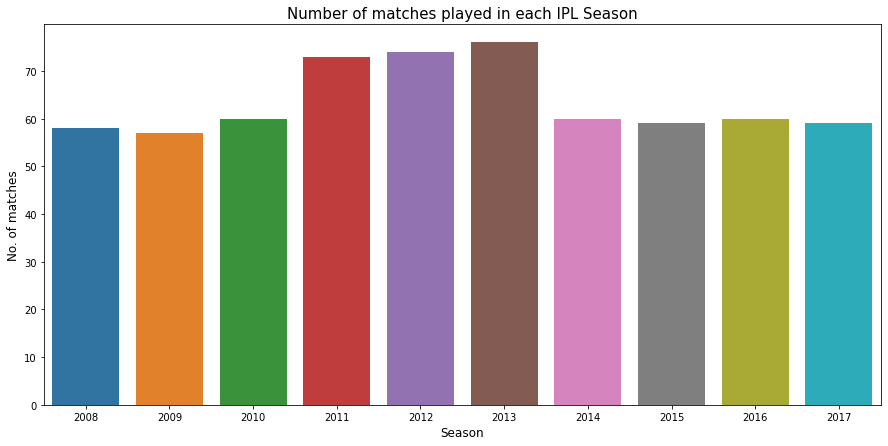

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(x="season",data=matches)
plt.xlabel('Season',fontsize=12)
plt.ylabel('No. of matches',fontsize=12)
plt.title('Number of matches played in each IPL Season',fontsize=15)
plt.show()

**Here, we can see the total no. of matches played in the respective season**

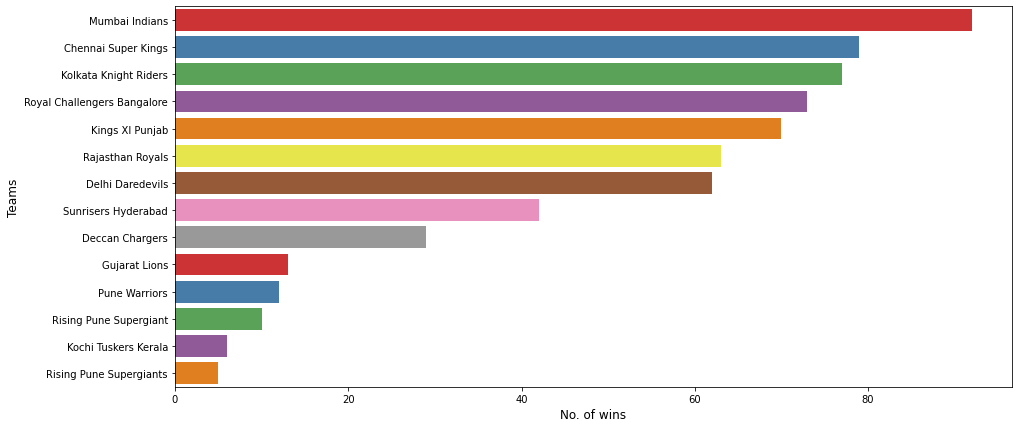

In [19]:
order = matches['winner'].value_counts().index
plt.figure(figsize=(15,7))
sns.countplot(y='winner',data=matches,order=order,palette='Set1')
plt.xlabel("No. of wins",fontsize=12)
plt.ylabel("Teams",fontsize=12)
plt.show()

**Here, we see the total no. of wins for each team throughout all the seasons in IPL**



**As we can see, *Mumbai Indians* have the highest number of wins throughout all seasons, followed by *Chennai Super Kings***(ofc cuz mumbai da best😤)


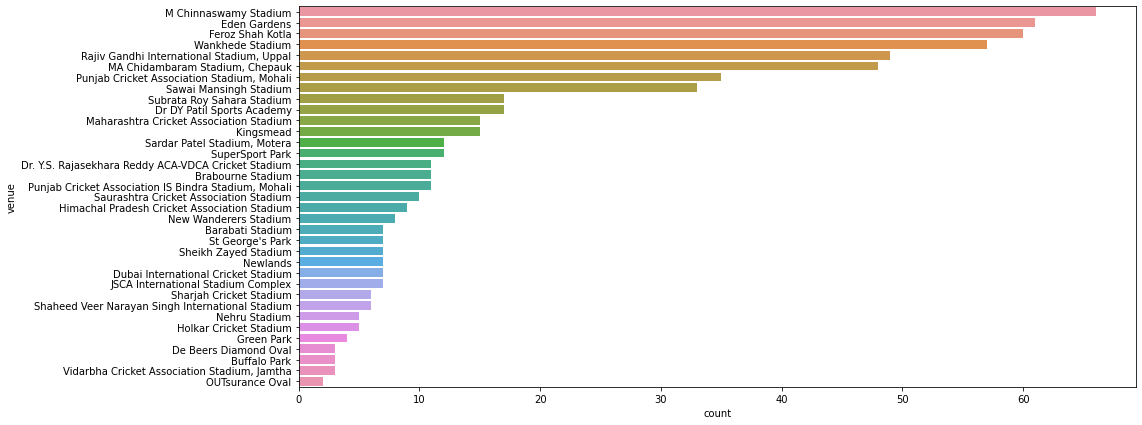

In [20]:
order = matches['venue'].value_counts().index
plt.figure(figsize=(15,7))
sns.countplot(data=matches,y='venue',order=order)
plt.show()

**Here we see the no. of matches played in all the stadiums.**

**But for now, let us look at only the top 10 stadiums**

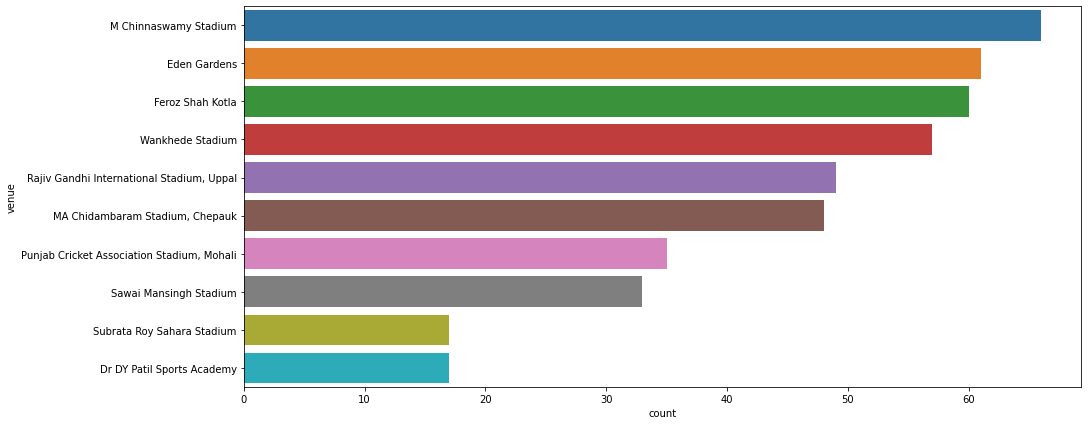

In [21]:
order = matches['venue'].value_counts().index
plt.figure(figsize=(15,7))
sns.countplot(data=matches,y='venue',order=order[:10])
plt.show()

**Here we see, Most of the matches were played in the *M Chinnaswamy Stadium*** 
 

**Now let us check the no. of Man of the Match award for each player**

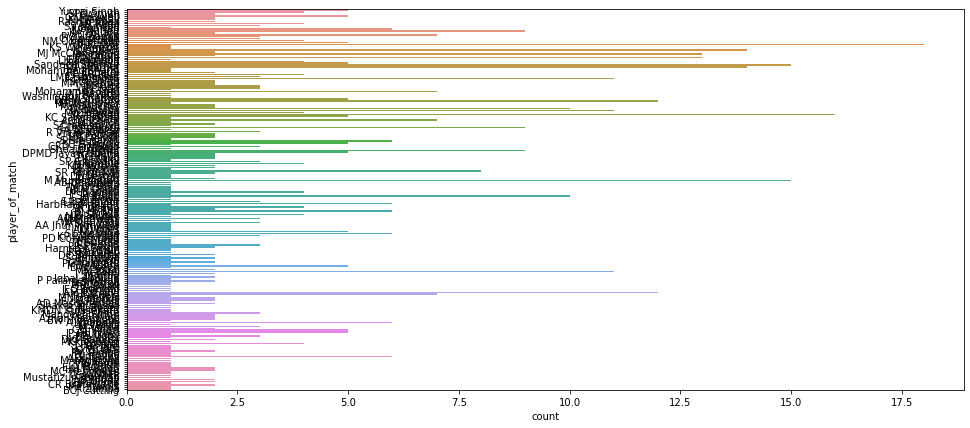

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(data=matches,y='player_of_match')
plt.show()

**Hmm, that, does not look good. Let us look at the top 10 players for now**

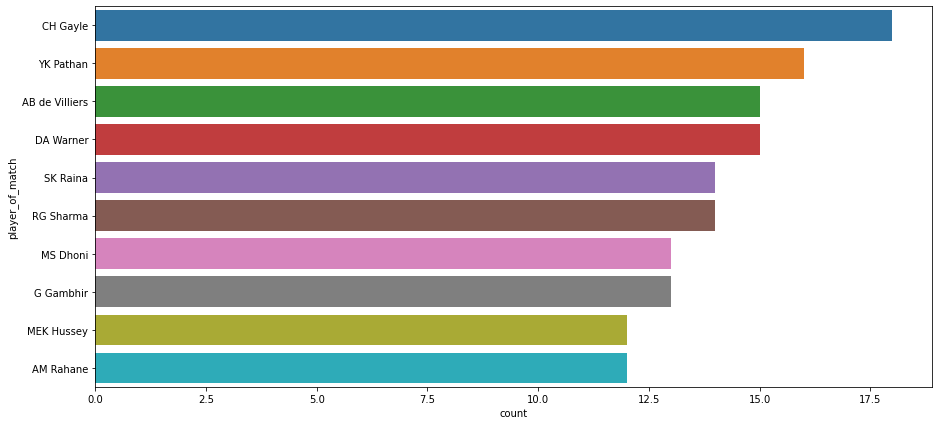

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(data=matches,y='player_of_match',order=matches['player_of_match'].value_counts().index[:10])
plt.show()

**Looks like CH Gayle has a lot of Man of Match awards to his name**

**Let's check which team has the most luck, winning the tosses**

[]

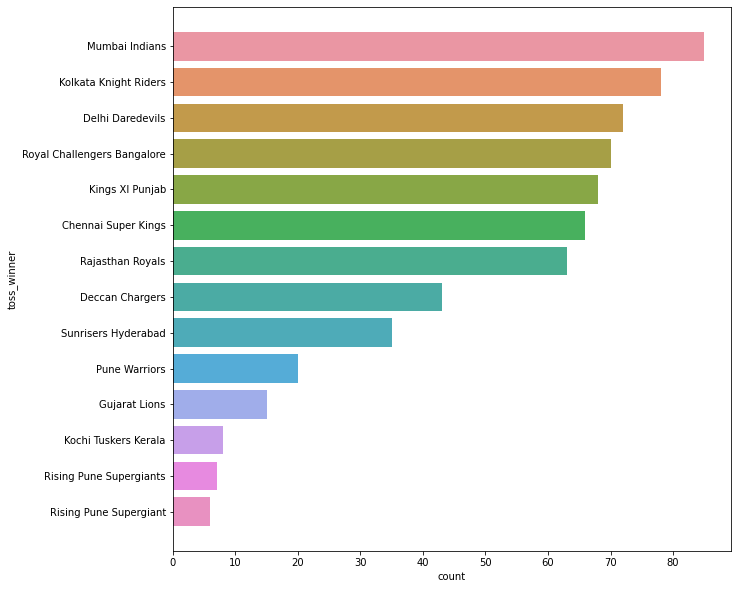

In [24]:
order=matches['toss_winner'].value_counts()
plt.figure(figsize=(10,10))
sns.countplot(data=matches,y=matches['toss_winner'],order=order.index)
plt.plot()

***Mumbai Indians* have an upper hand in winning the toss as well!**

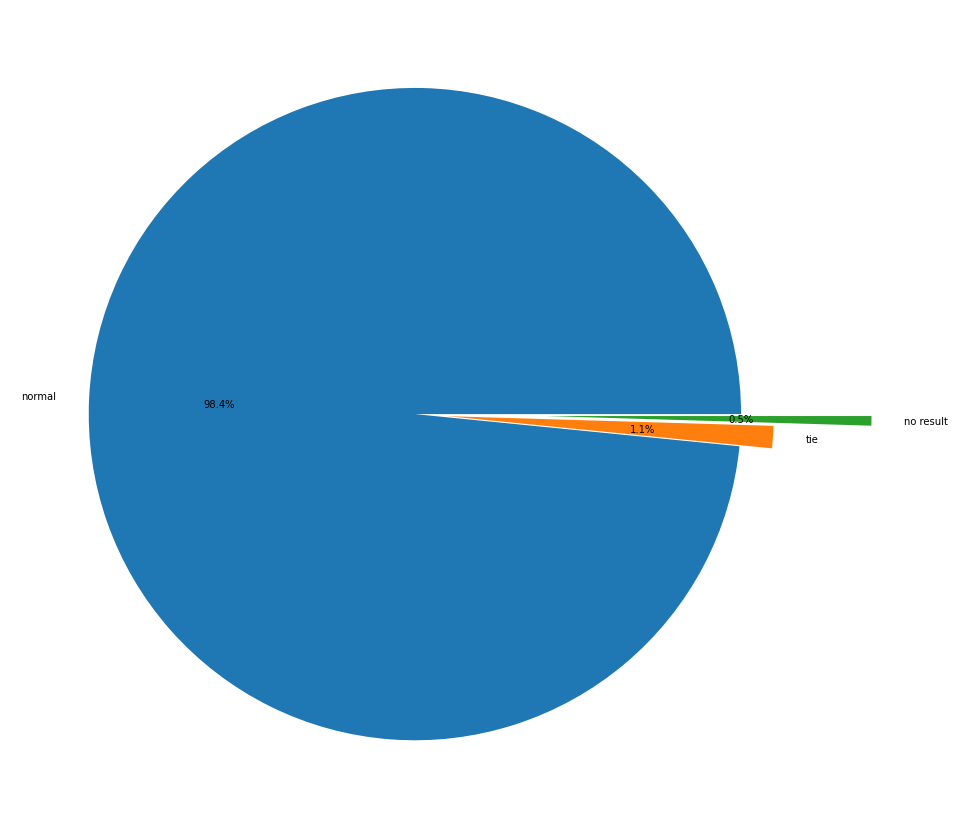

In [25]:
plt.figure(figsize=(15,15))
plt.pie(matches['result'].value_counts(),labels=list(matches['result'].value_counts().index),autopct='%0.1f%%',explode=[0,0.1,0.4])
plt.show()

**Looks like most of the matches that  happened, had normal results!**

**Let us now seggregate the teams based on how they won the match, batting first or second**

In [26]:
batting_first=matches[matches['win_by_runs']!=0]
batting_second=matches[matches['win_by_wickets']!=0]

**Here we get the winners of matches who won it batting first/second by checking the respective *'win_by'* fields**

**Now let us check the win percentage of each time when they opt to bat first**

[]

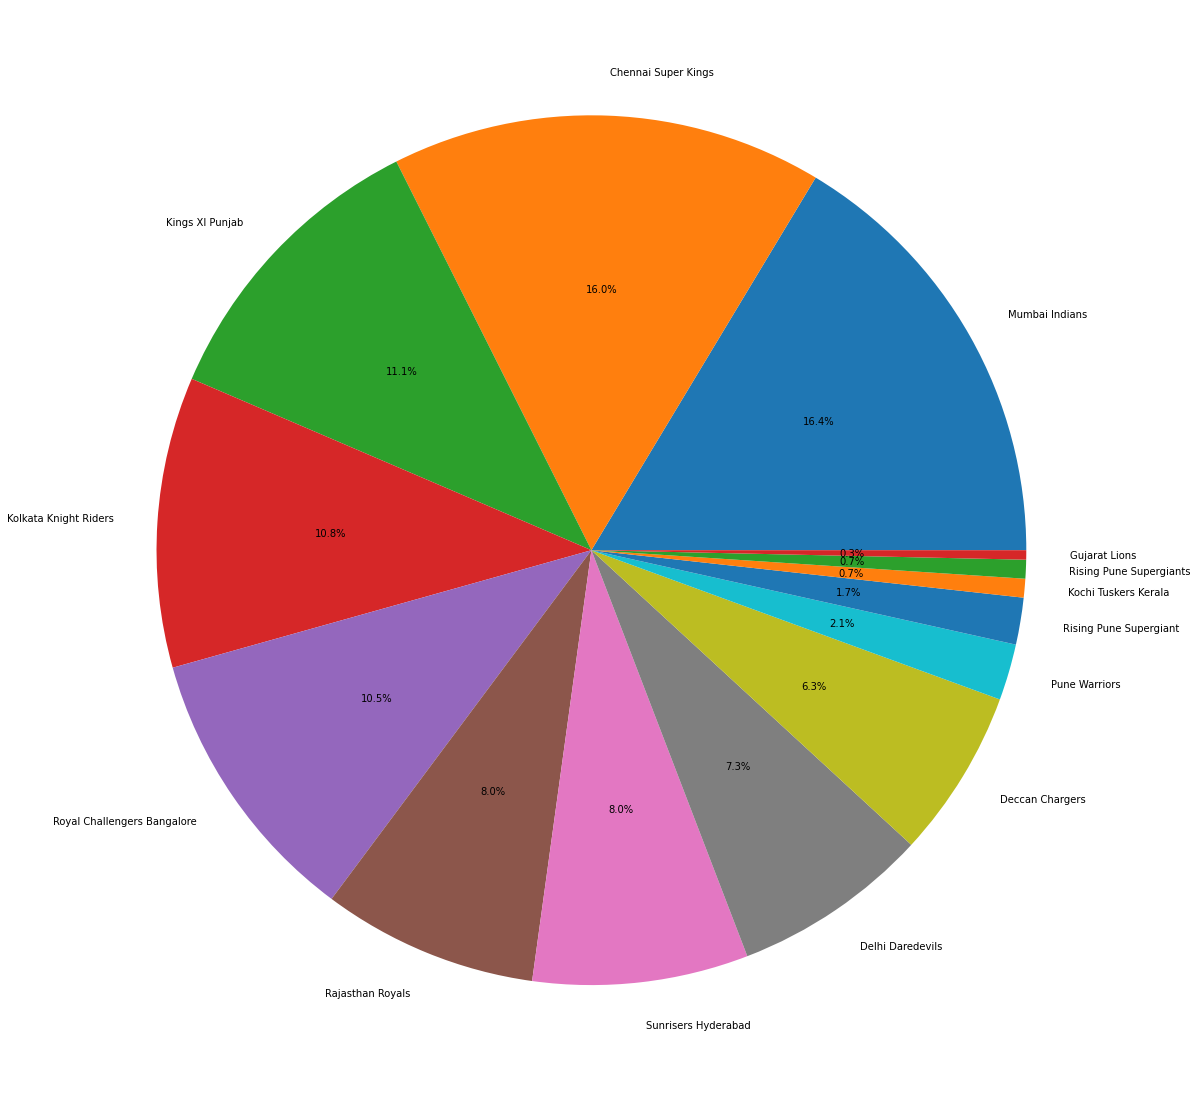

In [27]:
plt.figure(figsize=(20,20))
plt.pie(batting_first['winner'].value_counts(),labels=batting_first['winner'].value_counts().index,autopct='%0.1f%%')
plt.plot()

**The most no. of wins, batting first, are by mumbai Indians**(as expected,jk)


**Similarly, let us check for winning percent when teams bat second**

[]

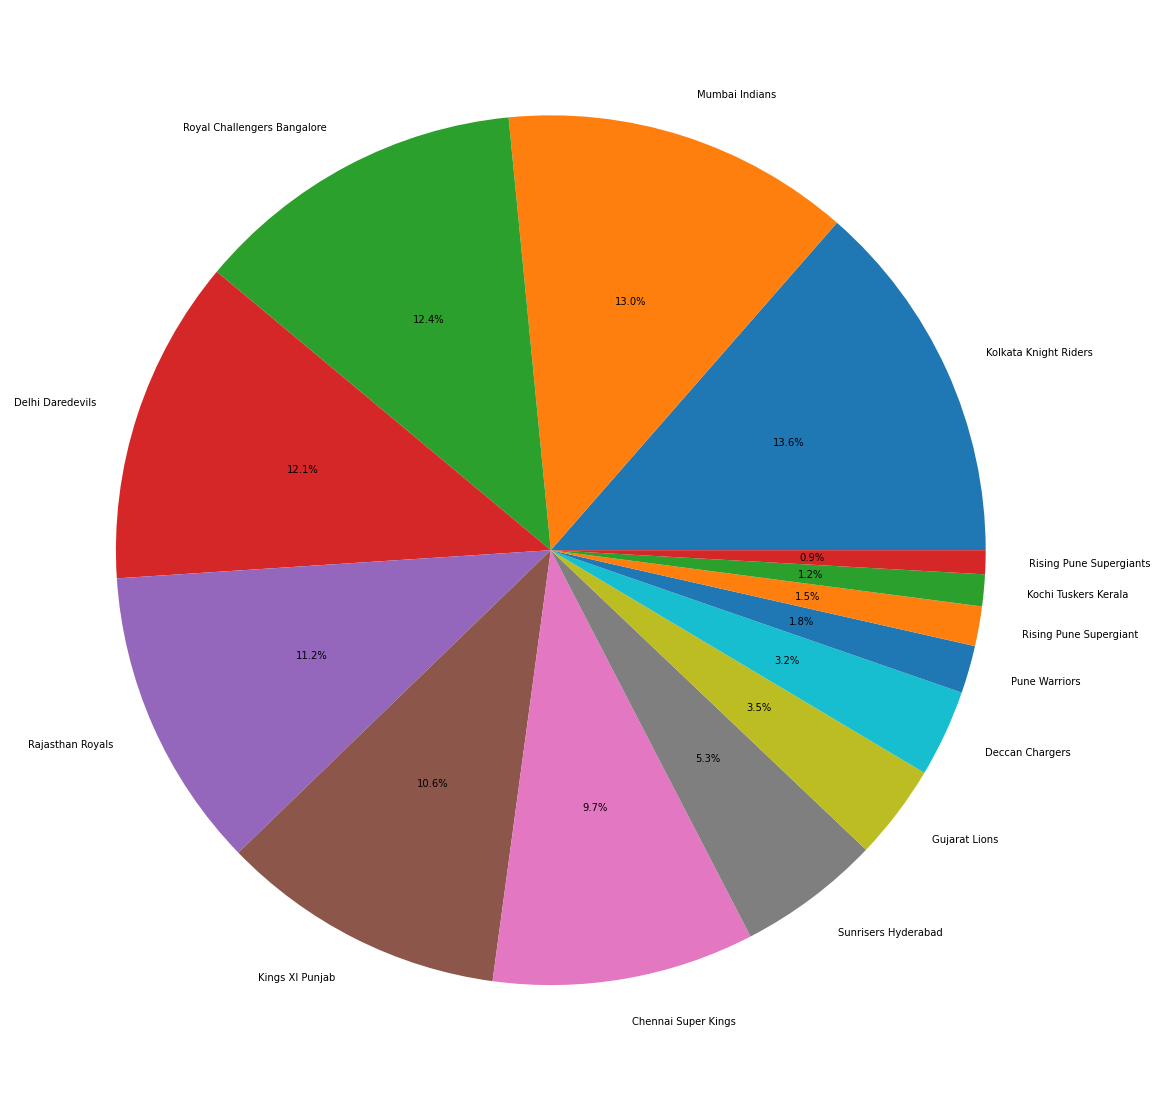

In [28]:
plt.figure(figsize=(20,20))
plt.pie(batting_second['winner'].value_counts(),labels=batting_second['winner'].value_counts().index,autopct='%0.1f%%')
plt.plot()

**We can see, Kolkata Knight Riders have the highest percentage of wins, while batting second**(they are good at chasing)

[]

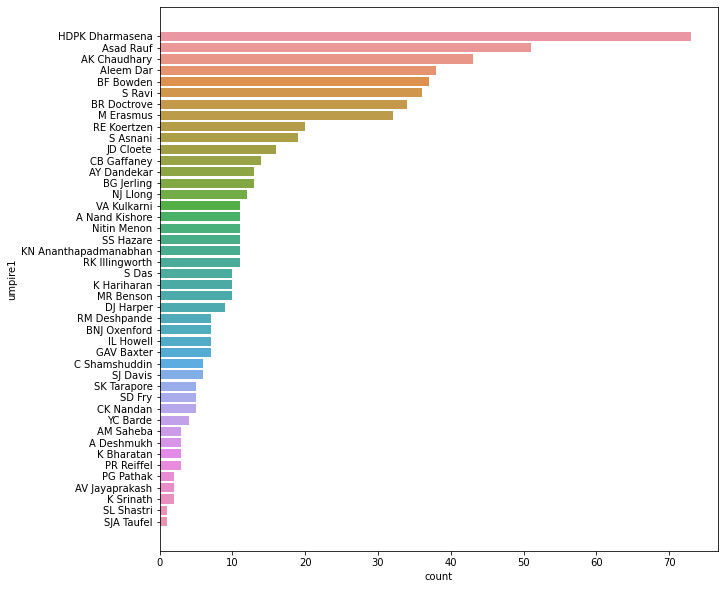

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(data=matches,y='umpire1',order=matches['umpire1'].value_counts().index)
plt.plot()

***HDPK DHARMASENA* has umpired the most number of matches as we can see.**

**Now let us check whether the match winner is the same as toss winner!**

In [30]:
same = matches[matches['winner']==matches['toss_winner']]
not_same = matches[matches['winner']!=matches['toss_winner']]
print(len(same),len(not_same))

325 311


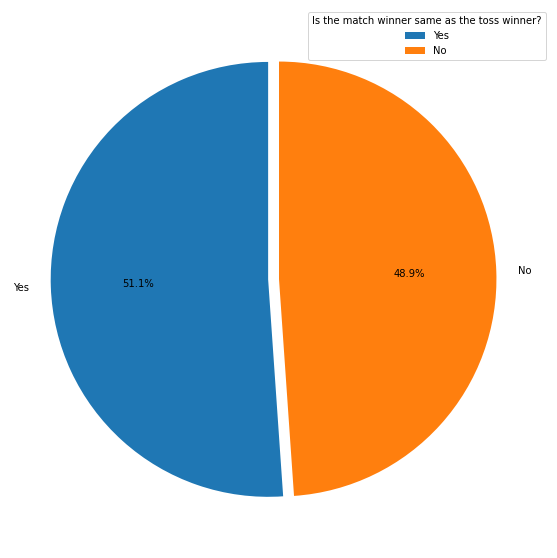

In [31]:
plt.figure(figsize=(10,10))
plt.pie([len(same),len(not_same)],labels=['Yes','No'],autopct='%0.1f%%',explode=[0.05,0],startangle=90)
plt.legend(title="Is the match winner same as the toss winner?")
plt.show()

**At last, Lets check which team has the most IPL trophies to its name**

In [194]:
winning_teams = matches[['season','winner']]
winners_team = {}
for i in sorted(winning_teams.season):
  winners_team[i]=winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL,columns=['teams'])
winners_of_IPL

,teams
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


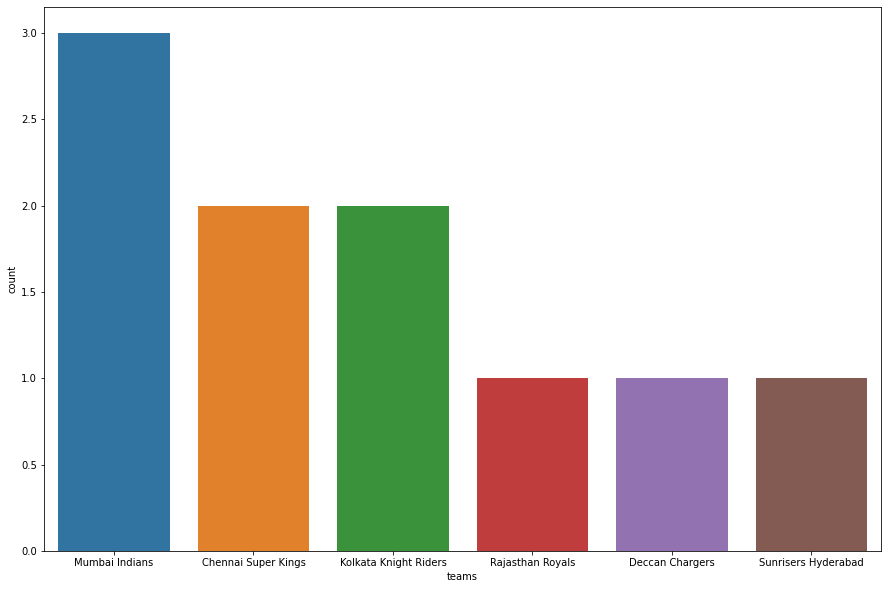

In [200]:
plt.figure(figsize=(15,10))
sns.countplot(data=winners_of_IPL,x='teams',order = winners_of_IPL['teams'].value_counts().index)
plt.show()

**Looks like *Mumbai Indians* has the most no. of trophies**

**Enough about the matches dataframe. Let us take a look at the deliveries dataframe**

**First, let us check who has bowled the most no. of overs, throughout all the seasons**

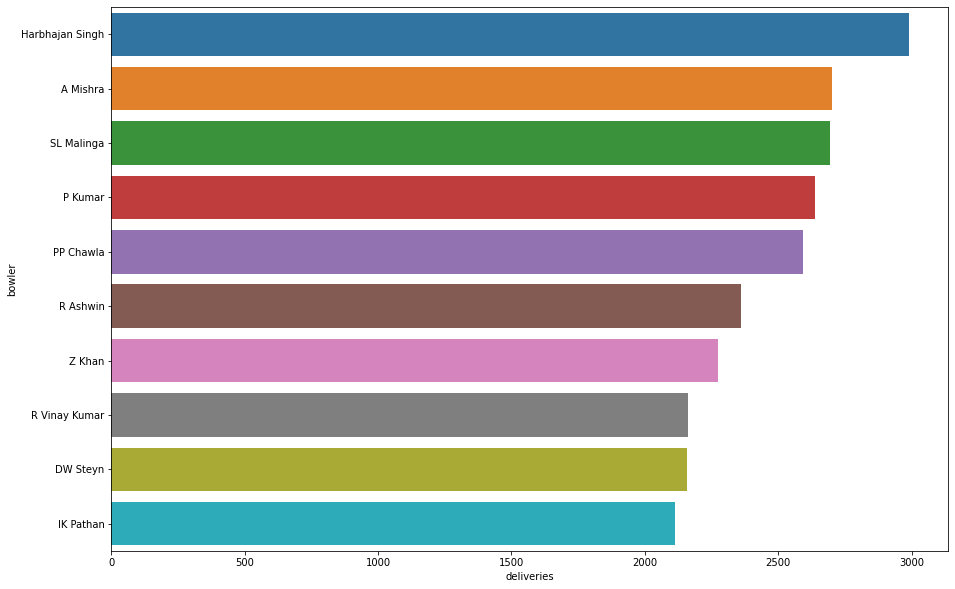

In [68]:
order = deliveries['bowler'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=deliveries,y='bowler',order=order.index[:10])
plt.xlabel("deliveries")
plt.show()

**Looks like Harbhajan Singh has bowled the most no. of overs**

In [60]:
#No. of Overs Bowled by each bowler
round(deliveries['bowler'].value_counts()[:10]/6)

Harbhajan Singh    498.0
A Mishra           450.0
SL Malinga         449.0
P Kumar            440.0
PP Chawla          432.0
R Ashwin           393.0
Z Khan             379.0
R Vinay Kumar      360.0
DW Steyn           360.0
IK Pathan          352.0
Name: bowler, dtype: float64

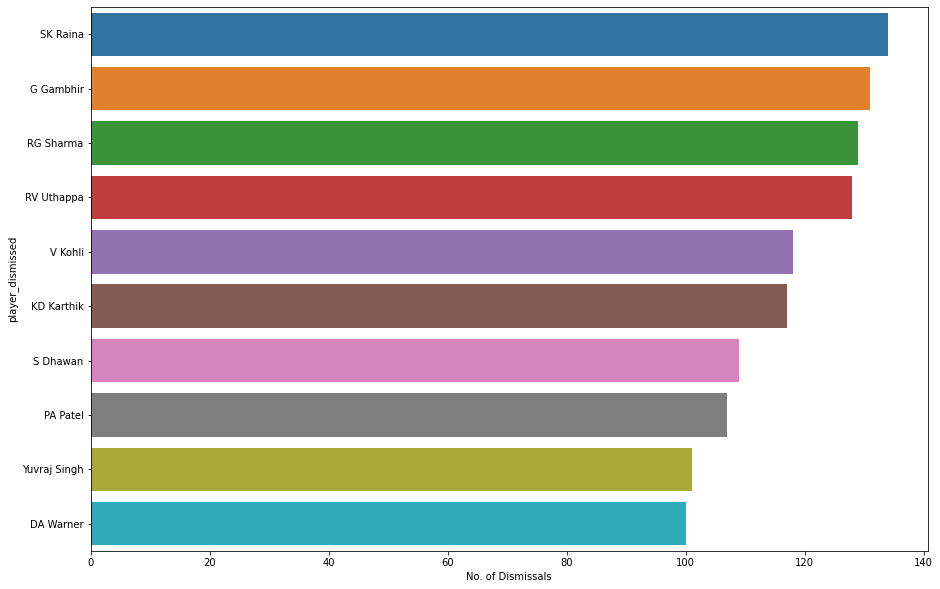

In [69]:
order = deliveries['player_dismissed'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=deliveries,y='player_dismissed',order=order.index[:10])
plt.xlabel("No. of Dismissals")
plt.show()

**Above countplot shows the no. of dismissals each batsman has faced. *SK Raina* has the most no. of dismissals.**

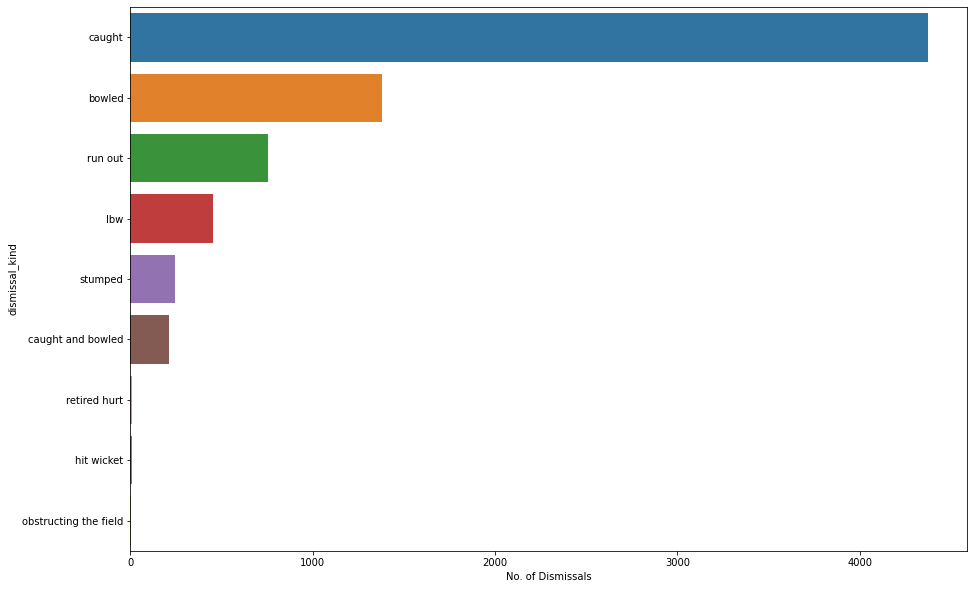

In [74]:
order = deliveries['dismissal_kind'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=deliveries,y='dismissal_kind',order=order.index[:10])
plt.xlabel("No. of Dismissals")
plt.show()

**The above countplot shows,which types of dismissals happened throughout all the seasons. The most no. of dismissals that happened were *'caught'*.**

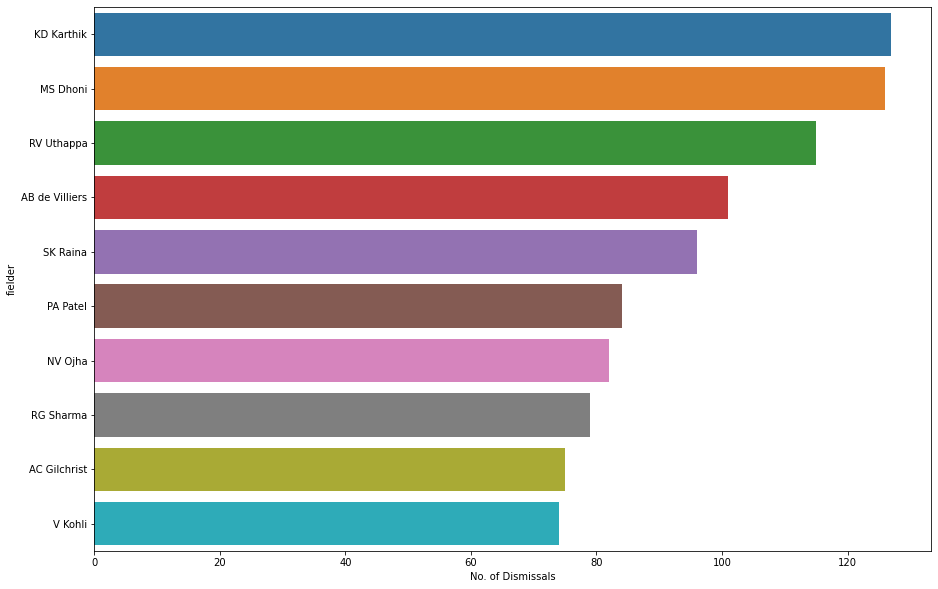

In [77]:
order = deliveries['fielder'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=deliveries,y='fielder',order=order.index[:10])
plt.xlabel("No. of Dismissals")
plt.show()

**In the above countplot, we can see who has done most no. of dismissals while fielding.**

In [80]:
stumpings = deliveries[deliveries['dismissal_kind']=='stumped']

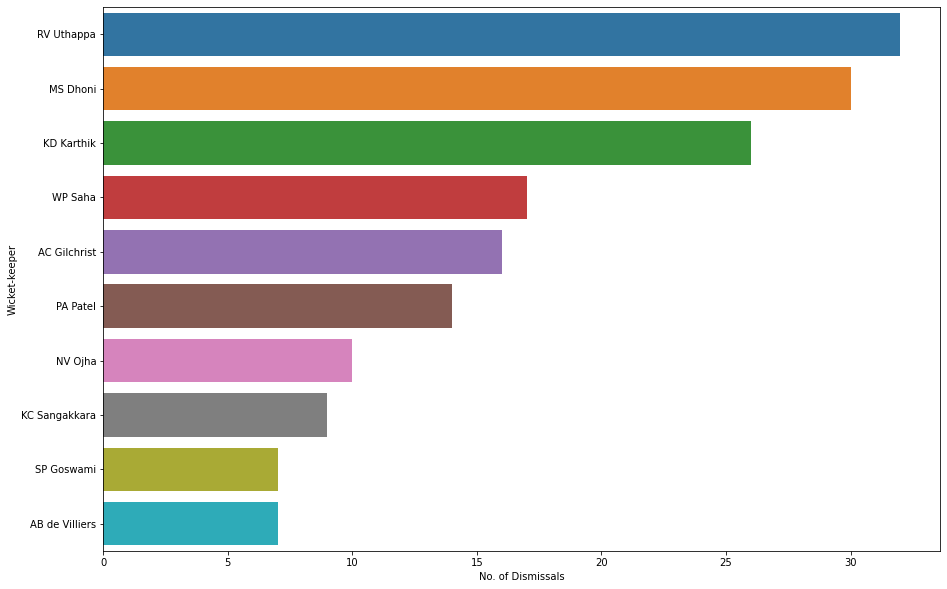

In [81]:
order = stumpings['fielder'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=stumpings,y='fielder',order=order.index[:10])
plt.ylabel("Wicket-keeper")
plt.xlabel("No. of Dismissals")
plt.show()

**Here we can see the most successful wicket keeper, who has taken most no. of wickets behind the stumps.Looks like *RV Uthappa* has the most number of stumpings**

In [88]:
super_overs = deliveries[deliveries['is_super_over']==1]

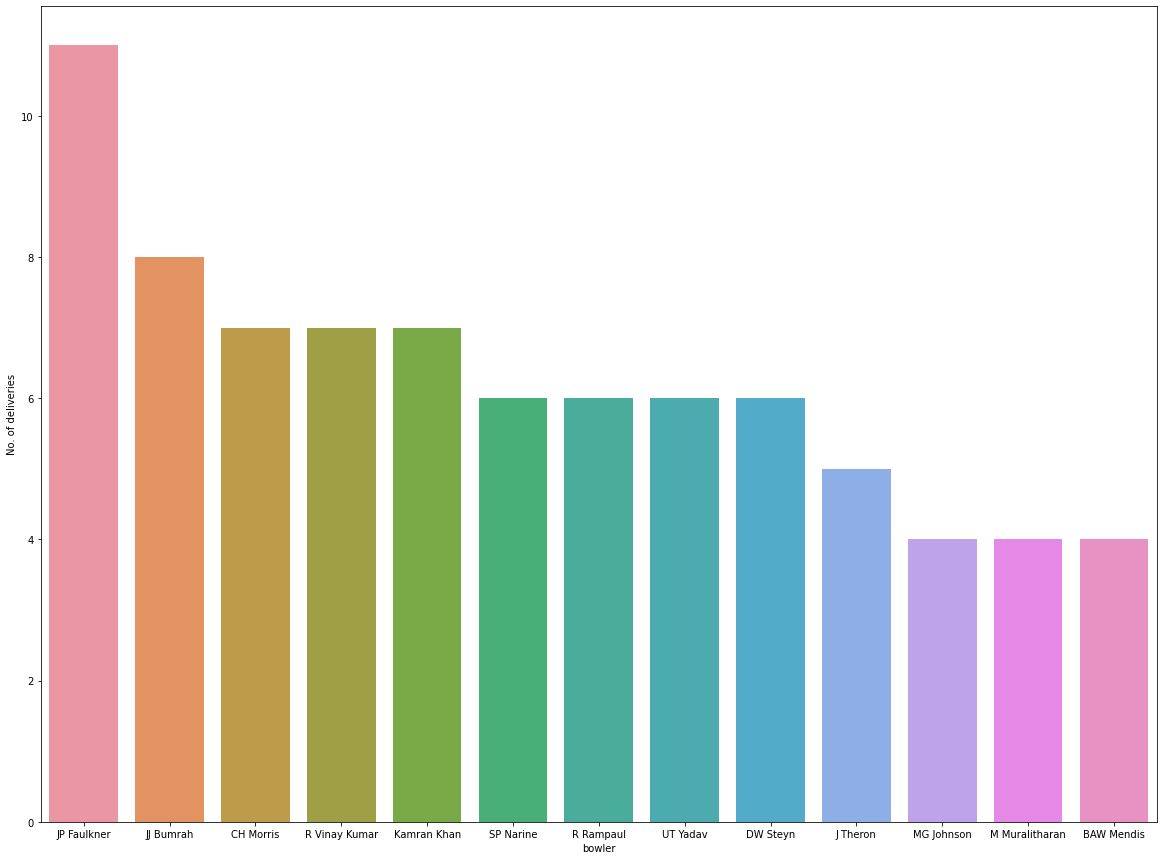

In [94]:
order = super_overs['bowler'].value_counts()
plt.figure(figsize=(20,15))
sns.countplot(data=super_overs,x='bowler',order=order.index)
plt.ylabel("No. of deliveries")
plt.show()

**THE above figure shows which bowler has bowled most no. deliveries in SUPER OVERS. By the look of it, looks like *JP Faulkner* was the goto bowler for the super overs**

**After Knowing so much things about both the dataframes individually, let us merge both the dataframes and check what new data can be analyzed from the merged dataframe**

In [96]:
merge_df = pd.merge(deliveries,matches,left_on='match_id',right_on='id')

In [98]:
merge_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

**Let us now check for missing values in the dataframes**

In [119]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

**The columns *city, winner, player_of_match, umpire1, umpire2, umpire3* have missing values**

**The column umpire3 has most no. of missing values, so we can just drop/delete it.**

In [120]:
#Dropping the matches['umpire3'] column
matches.drop('umpire3',axis=1,inplace=True)

**Now let us one by one check/handle missing values for the remaining columns**

In [121]:
#Find the venue for all the missing 'city' values
matches[matches['city'].isnull()].head(20)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


Here we can see all the values which are missing for 'city' have venue as 'Dubai international Stadium'. So the 'city'  for the respective rows/matches should be 'Dubai'.


In [122]:
#Filling missing 'city' values with 'Dubai'
matches['city'] = matches['city'].fillna('Dubai')

In 'matches' datframe *player_of_match, umpire1, umpire2* have 3,1,1 missing values respectively. We can simply drop the rows with the missing values

In [123]:
matches[(matches['player_of_match'].isnull()) | (matches['umpire1'].isnull()) | (matches['umpire2'].isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


In [124]:
matches.dropna(subset=['umpire1','umpire1','player_of_match'],inplace=True)

In [127]:
#updated shape of 'matches' df
matches.shape

(632, 17)

In [128]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [131]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [143]:
#The team 'Rising Pune Supergiant' and 'Rising Pune Supergiants' is the same,so we make them of the same name.
matches['team1']=matches['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team2']=matches['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['winner']=matches['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [152]:
print("Unique City values:",len(matches['city'].unique()))
print("Unique venue values:",len(matches['venue'].unique()))


Unique City values: 31
Unique venue values: 35


Here we can see there are *35* unique values for venue, whereas there are *31* unique values for city.

In [160]:
city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

In [164]:
#lets check for batting_team and bowling_team values in deliveries.csv
print(deliveries['batting_team'].unique())
print(deliveries['bowling_team'].unique())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants']
['Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Rising Pune Supergiant' 'Mumbai Indians' 'Kolkata Knight Riders'
 'Gujarat Lions' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']


Similar to that of matches dataset, the deliveries dataset too has duplicate values for *Rising Pune Supergiants*. Let us replace them with the correct values

In [165]:
deliveries['batting_team'] = deliveries['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants') 

Let's merge both the datasets again!

In [168]:
merge_df = pd.merge(deliveries,matches,left_on='match_id',right_on='id')
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149886,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
149887,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
149888,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
149889,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford


**So after a brief analysis of both *matches* and *deliveries* dataframes, let us now analyse the *merged_df*.**

Let us first check how many runs have been scored over the years in each season.

Text(0, 0.5, 'Runs')

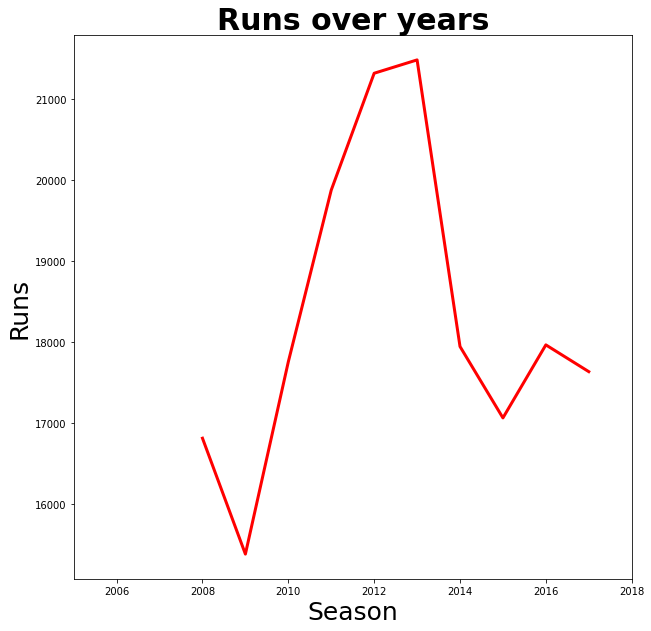

In [227]:
total_runs=merge_df.groupby('season')['batsman_runs'].sum()
plt.figure(figsize=(10,10))
plt.plot(total_runs,linestyle = '-',linewidth = 3,color='red')
plt.title("Runs over years",fontweight='bold',fontsize='30')
plt.xlim([2005,2018])
plt.xlabel("Season",fontsize=25)
plt.ylabel("Runs",fontsize=25)

Now let us check which batsman has scored most runs until the last season of the IPL.


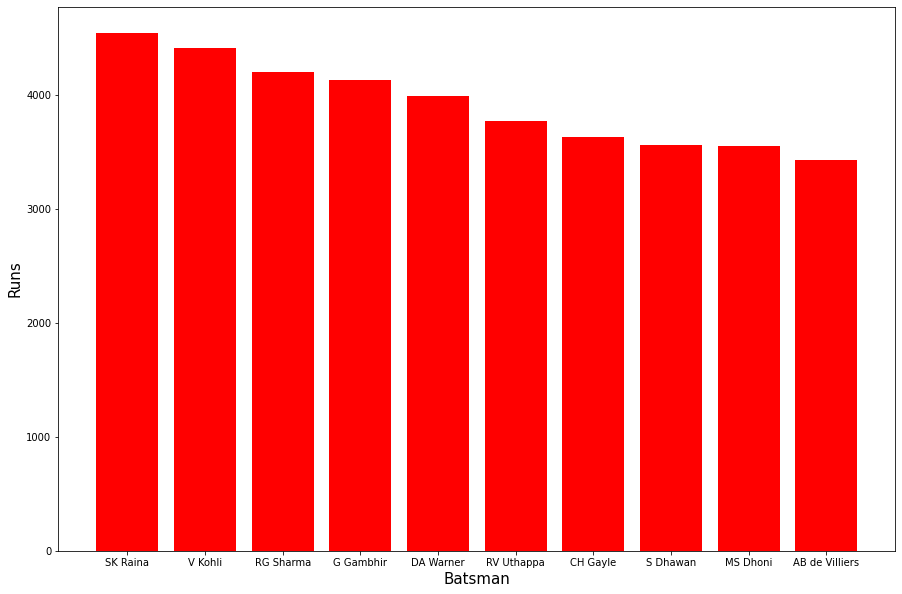

In [244]:
highest_run_scorers = merge_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(15,10))
plt.bar(highest_run_scorers.index,highest_run_scorers.values,color='red')
plt.xlabel("Batsman",fontsize=15)
plt.ylabel("Runs",fontsize=15)
plt.show()

**We can clearly see, *SK Raina* has scored most no. of runs, followed by *V Kohli***

Text(0, 0.5, 'Total Runs')

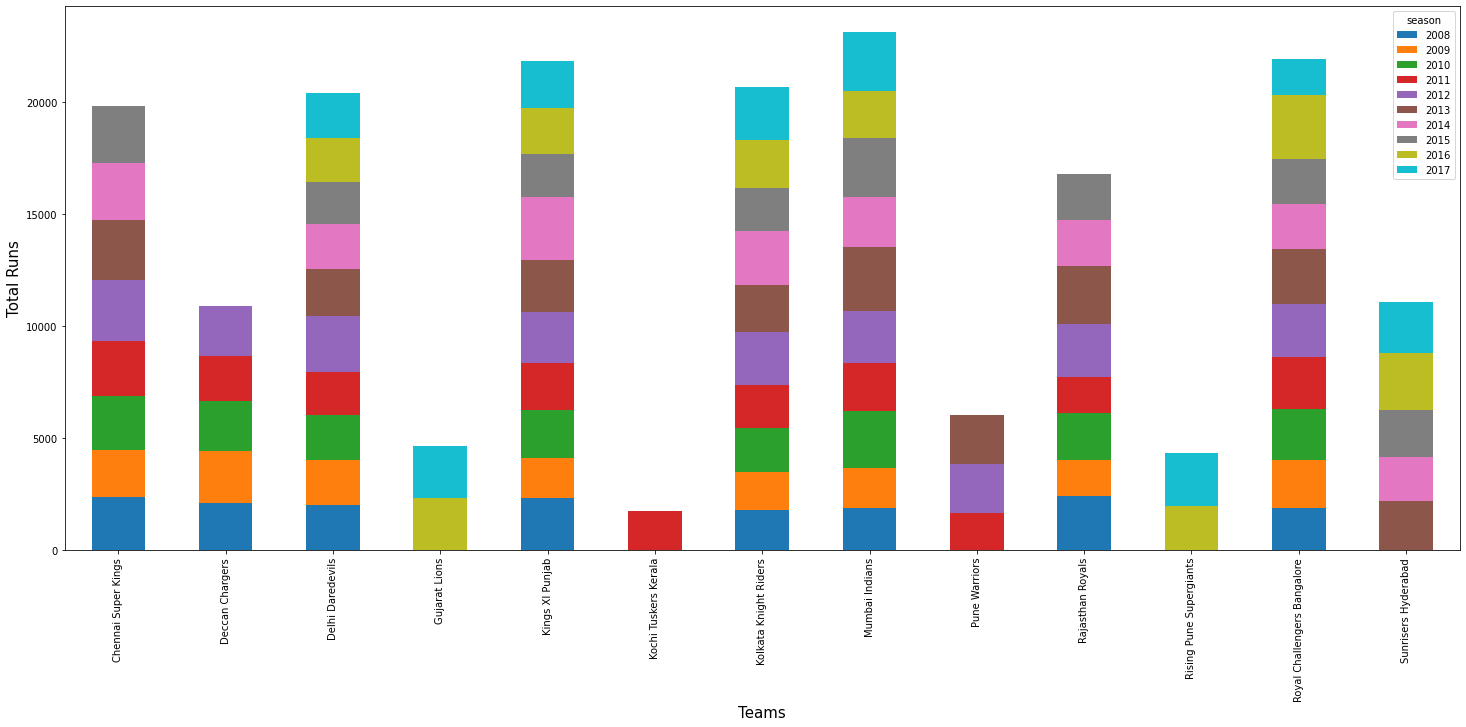

In [261]:
merge_df.groupby(['batting_team','season'])['batsman_runs'].sum().unstack().plot(kind='bar',stacked=True,figsize=(25,10))
plt.xlabel("Teams",fontsize=15)
plt.ylabel("Total Runs",fontsize=15)

We can see here some of the teams have missing values for some years. That is because the teams either didn't play for those years or were discontinued.

**Let us make a copy of the original DataFrame so we avoid any data loss**

In [356]:
matches_copy = matches[['team1','team2','toss_winner','toss_decision','venue','city','winner']]
matches_copy

,team1,team2,toss_winner,toss_decision,venue,city,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Maharashtra Cricket Association Stadium,Pune,Rising Pune Supergiants
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Saurashtra Cricket Association Stadium,Rajkot,Kolkata Knight Riders
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Holkar Cricket Stadium,Indore,Kings XI Punjab
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,Sunrisers Hyderabad
...,...,...,...,...,...,...,...
631,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Shaheed Veer Narayan Singh International Stadium,Raipur,Royal Challengers Bangalore
632,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,Royal Challengers Bangalore
633,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Feroz Shah Kotla,Delhi,Sunrisers Hyderabad
634,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Feroz Shah Kotla,Delhi,Sunrisers Hyderabad


The data present in the DaraFrame is in text/string format which, as we all know, cannot be interpreted by the models as it is. That's why,w e have to convert the data into integers by assigning each unique value in the rows, a integer. 

We can achieve this *Conversion* by encoding the data using *LabelEncoder* method from *sklearn.preprocessing* library.

In [280]:
from sklearn.preprocessing import LabelEncoder

In [357]:
encoder=LabelEncoder()
matches_copy['team1'] = encoder.fit_transform(matches["team1"])
matches_copy['team2'] = encoder.fit_transform(matches["team2"])
matches_copy['winner'] = encoder.fit_transform(matches["winner"].astype(str))
matches_copy['toss_winner'] = encoder.fit_transform(matches["toss_winner"])
matches_copy['venue'] = encoder.fit_transform(matches["venue"])
matches_copy['city'] = encoder.fit_transform(matches["city"])
matches_copy['toss_decision'] = encoder.fit_transform(matches["toss_decision"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Let us take a look at the data types of the columns.

In [359]:
matches_copy.dtypes

team1            int64
team2            int64
toss_winner      int64
toss_decision    int64
venue            int64
city             int64
winner           int64
dtype: object

Nice! As we can see, there is no trace of string type columns in the dataframe. This will help us a lot while predicting the values.

In [422]:
#Importing Required Libraries For Model training and calculating accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
import numpy as np
from sklearn.model_selection import train_test_split

After importing the required libraries, we will convert the data into training and testing data.

In [418]:
predictor_var = ['team1','team2','toss_winner','city','venue','toss_decision']
result_var = ['winner']

X_train,X_test,y_train,y_test = train_test_split(matches_copy[predictor_var],matches_copy[result_var],test_size=0.2,random_state=0)

Now let us one-by-one apply each of the model training to our dataset and check the accuracy for each model.

In [431]:
#LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)
predicted = model.predict(X_test)
a=metrics.accuracy_score(y_test,predicted)
Log_Reg = a*100
print(Log_Reg)

22.04724409448819


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [432]:
#Random Forest Classifier
model = RandomForestClassifier()

model.fit(X_train,y_train)
predicted = model.predict(X_test)
a=metrics.accuracy_score(y_test,predicted)
Rand_For_Class = a*100
print(Rand_For_Class)

52.75590551181102


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [433]:
#Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(X_train,y_train)
predicted = model.predict(X_test)
a=metrics.accuracy_score(y_test,predicted)
Dec_Tree_Class = a*100

print(Dec_Tree_Class)

55.118110236220474


In [434]:
#Naive Bayes
model = GaussianNB()

model.fit(X_train,y_train)
predicted = model.predict(X_test)
a=metrics.accuracy_score(y_test,predicted)

Naive_Bayes = a*100
print(Naive_Bayes)

22.83464566929134


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [435]:
#Support Vector Machines
model = SVC()

model.fit(X_train,y_train)
predicted = model.predict(X_test)
a=metrics.accuracy_score(y_test,predicted)
SVM = a*100

print(SVM)

32.28346456692913


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Let us now compare the accuracy scores for each of the models!**

In [436]:
print("The Accuracy for the models is as follows:")
print("Logistic Regression:",Log_Reg)
print("Random Forest Classifier:",Rand_For_Class)
print("Decision Tree Classifier:",Dec_Tree_Class)
print("Naive Bayes:",Naive_Bayes)
print("Support Vector Machine(SVM):",SVM)

The Accuracy for the models is as follows:
Logistic Regression: 22.04724409448819
Random Forest Classifier: 52.75590551181102
Decision Tree Classifier: 55.118110236220474
Naive Bayes: 22.83464566929134
Support Vector Machine(SVM): 32.28346456692913
